In [0]:
from fastai import *
from fastai.tabular import *
import pandas as pd
from torchsummary import summary
import torch
from torch import nn
import imageio
import torch
import glob
from fastai.vision import *
import os
from torch import nn
import torch.nn.functional as F

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = False)
%cd "/content/drive/My Drive/automatic-asset-classification"
%ls "/content/drive/My Drive/automatic-asset-classification"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/automatic-asset-classification
data/


In [0]:
image_path = "/content/drive/My Drive/automatic-asset-classification/data/final_dataset"
size = 224
batchsize = 32
tfms = get_transforms(do_flip = False)
src = (ImageImageList.from_folder(image_path).split_by_rand_pct(seed=2).label_from_func(lambda x: x))
data = (src.transform(size=size, tfm_y=True)
        .databunch(bs=batchsize)
        .normalize(imagenet_stats, do_y = False))

In [0]:
class AutoEncoder(nn.Module):

    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
            nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True)
        )

        self.decoder = nn.Sequential(
            nn.Upsample(scale_factor = 2, mode = 'bilinear'),
            nn.Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
            nn.ReLU(inplace=True)
        )
        

        

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [0]:
autoencoder = AutoEncoder()

In [0]:
learn = Learner(data, autoencoder, loss_func=F.mse_loss);

In [7]:
learn.lr_find()

epoch,train_loss,valid_loss,time
0,0.158983,#na#,01:19
1,0.159088,#na#,00:13
2,0.154555,#na#,00:13
3,0.136483,#na#,00:13
4,0.115221,#na#,00:13
5,0.108241,#na#,00:13
6,0.164365,#na#,00:13
7,0.192726,#na#,00:13


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


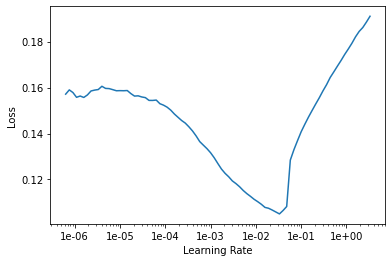

In [8]:
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(100, max_lr = 1e-02)

epoch,train_loss,valid_loss,time
0,0.087368,0.078295,00:43
1,0.063857,0.043421,00:18
2,0.052329,0.036857,00:18
3,0.044842,0.029927,00:18
4,0.039647,0.030675,00:17
5,0.035451,0.025687,00:17
6,0.032207,0.023160,00:17
7,0.029432,0.023209,00:17
8,0.026955,0.018854,00:17
9,0.023935,0.014048,00:17


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [38]:
learn.data.train_dl[0]

TypeError: ignored

In [64]:
len(next(iter(learn.data.train_dl)))

2

In [0]:
teep = next(iter(learn.data.train_dl))

In [67]:
teep[0].shape

torch.Size([32, 3, 224, 224])

In [68]:
learn.data.train_ds

LabelList (387 items)
x: ImageImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
Path: /content/drive/My Drive/automatic-asset-classification/data/final_dataset

In [74]:
learn.data.train_dl.sampler

In [75]:
learn.data.train_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7ffa9b75bf98>, device=device(type='cuda'), tfms=[functools.partial(<function _normalize_batch at 0x7ffa3ac89400>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)], collate_fn=<function data_collate at 0x7ffa431d4d90>)

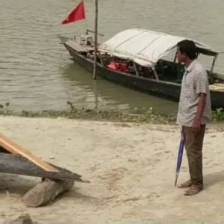

In [79]:
learn.data.train_dl.dl.dataset[0][0]